# 2D Distance Properties Plots

### Importing Tables

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


In [3]:
gal_table = Table.read('gal_table.txt', format = 'ascii.commented_header')
gal_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,gamma_ratio
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32
-99.0,0.0,146.714215072841,-1.0412800233313741,0.021222278475761414,-19.30365562438965,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9,0,1
1.0,1.0,146.6285851269414,-0.7651620976591762,0.0646563172340393,-19.97649574279785,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2,1,2
-99.0,0.0,146.63170644325592,-0.9883467023052999,0.05265425145626068,-18.431812286376953,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2,2,1
1.0,1.0,146.9341288729797,-0.6704053610430766,0.12127048522233963,-21.559162139892578,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9,3,2
-99.0,1.0,146.9634997327016,-0.5447758299302171,0.055980585515499115,-19.10099220275879,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2,4,1


## Getting values for Difference in Metallicity and N/O Ratio (Target - Neighboring)

In [4]:
#creating the new columns
dwarf_table['2D_Z12logOH_diff'] = np.nan
dwarf_table['2D_logNO_diff'] = np.nan

In [5]:
for i in range(len(dwarf_table)):
    
    di = gal_table['ID#'] == dwarf_table['2D_neighbor_ID'][i] #finding 2D neighboring galaxy in the large table
    
    dwarf_table['2D_Z12logOH_diff'][i] = dwarf_table['Z12logOH'][i] - gal_table['Z12logOH'][di]
    dwarf_table['2D_logNO_diff'][i] = dwarf_table['logNO'][i] - gal_table['logNO'][di]

In [6]:
dwarf_table[:20]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,2D_Z12logOH_diff,2D_logNO_diff
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,float64,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,nan,nan
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,nan,nan
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,nan,nan
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,nan,nan
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,nan,nan
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,nan,nan
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,nan,nan
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,nan,nan
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,-0.6413813818611205,0.08962193300563204


# Making Plots

## Color (u-r)

In [7]:
# Separating into Void, Wall, or Other Dwarf Galaxies

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

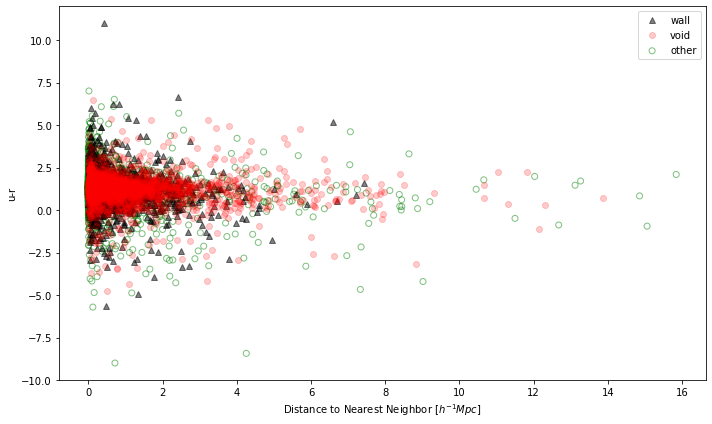

In [8]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('u-r');

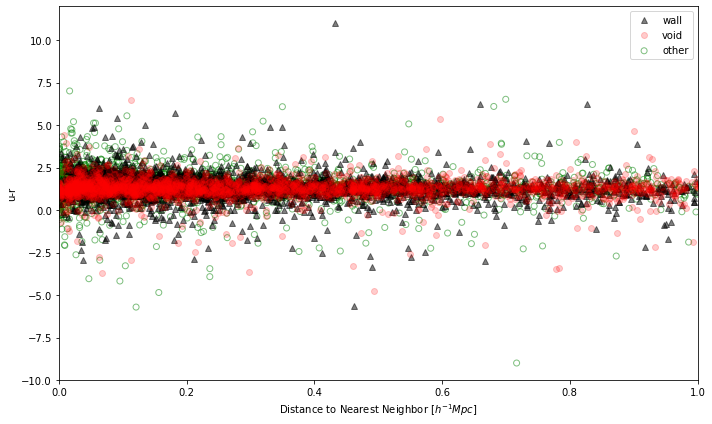

In [9]:
#limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('u-r')

plt.xlim([0,1]);


## Specific Star Formation Rate (sSFR)

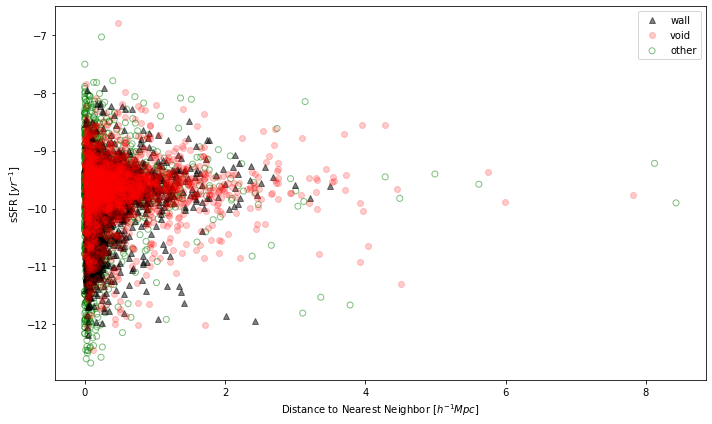

In [10]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['sSFR'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['sSFR'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['sSFR'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('sSFR [$yr^{-1}]$');

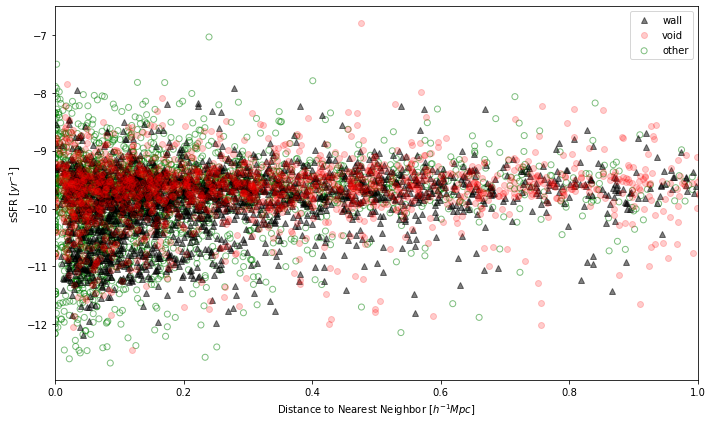

In [11]:
#limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['sSFR'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['sSFR'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['sSFR'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('sSFR [$yr^{-1}]$')
plt.xlim([0,1]);


## Metallicity (12 + log(O/H))

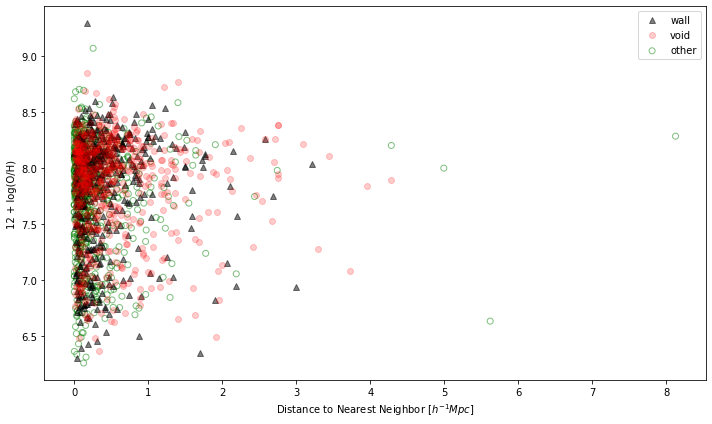

In [12]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['Z12logOH'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['Z12logOH'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['Z12logOH'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('12 + log(O/H)');

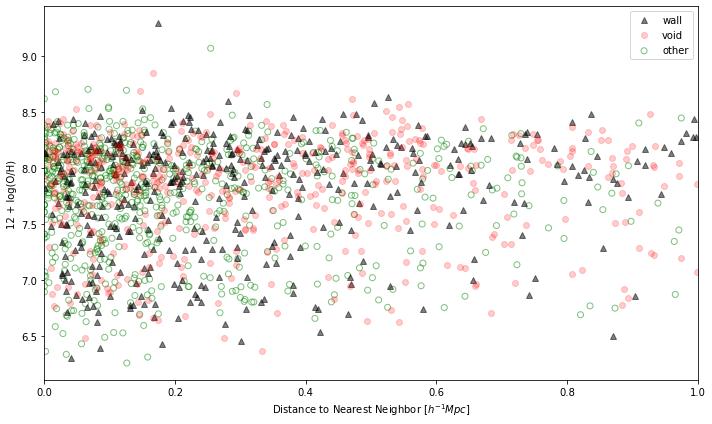

In [13]:
# limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['Z12logOH'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['Z12logOH'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['Z12logOH'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('12 + log(O/H)')
plt.xlim([0,1]);

## Metallicity Difference (target - neighbor)

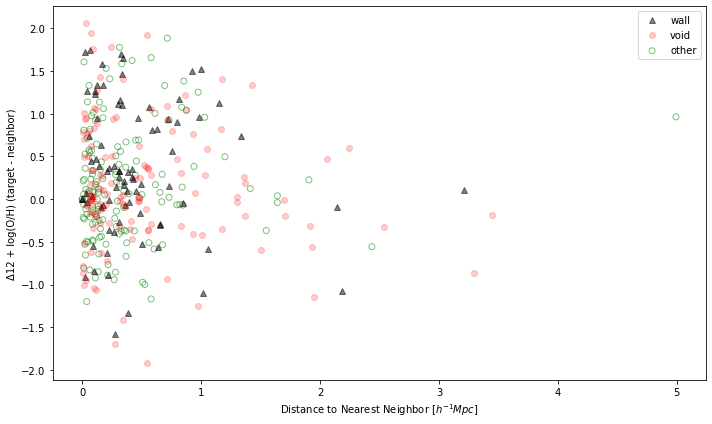

In [14]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['2D_Z12logOH_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['2D_Z12logOH_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['2D_Z12logOH_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δ12 + log(O/H) (target - neighbor)');

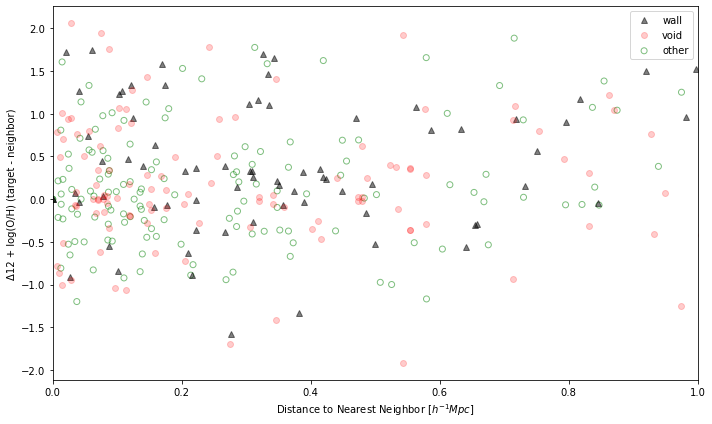

In [15]:
#limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['2D_Z12logOH_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['2D_Z12logOH_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['2D_Z12logOH_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δ12 + log(O/H) (target - neighbor)')

plt.xlim([0,1]);


## N/O Ratio

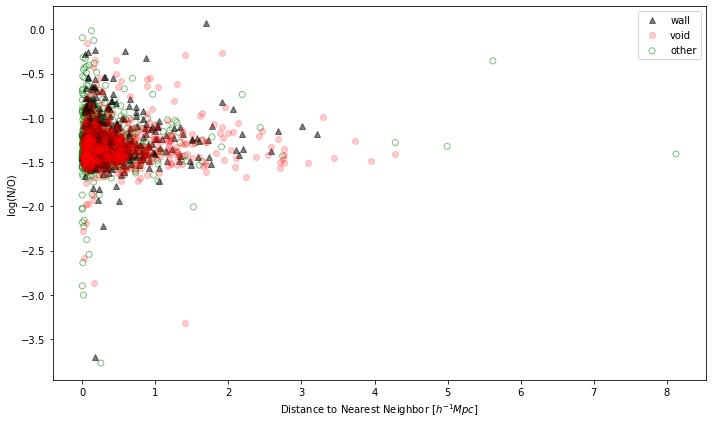

In [16]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['logNO'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['logNO'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['logNO'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('log(N/O)');

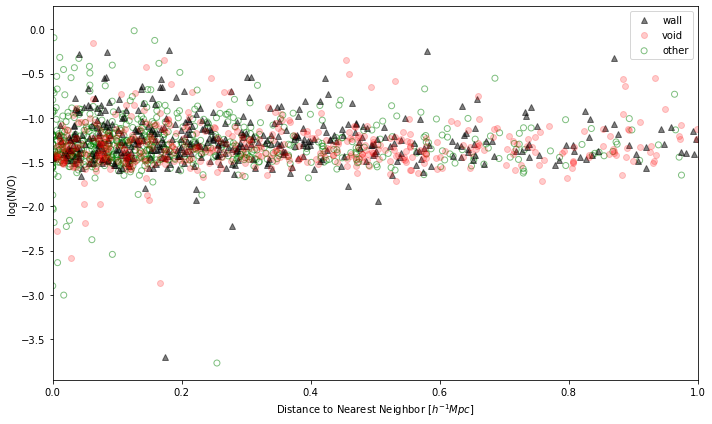

In [17]:
# limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['logNO'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['logNO'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['logNO'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('log(N/O)')

plt.xlim([0,1]);

## N/O Ratio Difference (target - neighbor)

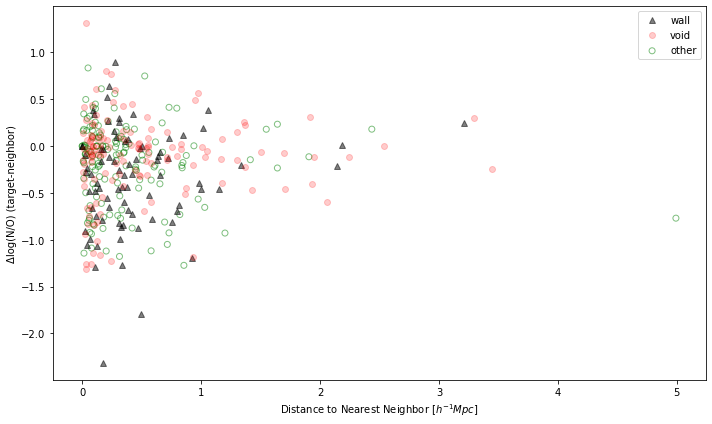

In [18]:
plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['2D_logNO_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['2D_logNO_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['2D_logNO_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δlog(N/O) (target-neighbor)');



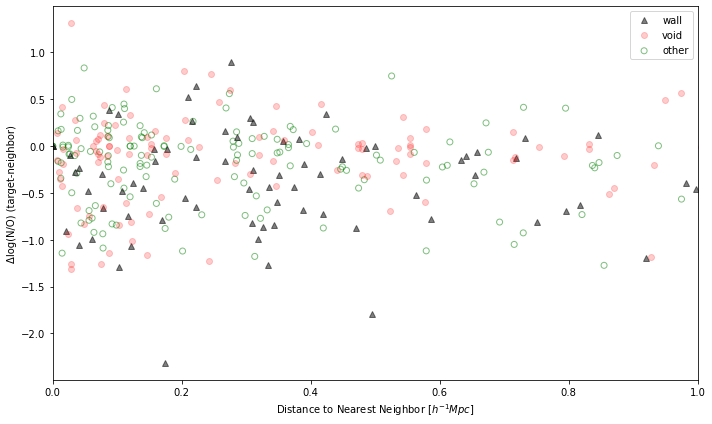

In [19]:
# limiting x axis

plt.rcParams["figure.figsize"] = (10,6)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['2D_logNO_diff'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['2D_logNO_diff'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['2D_logNO_diff'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('Δlog(N/O) (target-neighbor)')

plt.xlim([0,1]);

# Profile Histograms


In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

In [21]:
def profilehist(x, y, w=None, bins=10, uncertainty='stderr'):
    """Compute a profile histogram given x, y and optional weights.
    
    Parameters
    ----------
    x : (N,) array_like
        Sequence of values to be binned.
    y : (N,) array_like
        Data on which the statistic will be computed.
    w : None or (N,) array_like
        Weights for each data point y.
    bins : int or array_like
        If int, define equal-length bins given by data min/max range; else, user-defined bin edges.
    uncertainty : str
        'stderr' to compute standard error on the mean; 'sample' for sample uncertainty
        
    Returns
    -------
    xc : array of dtype float
        Bin centers in x.
    yavg : array of dtype float
        Average in each bin.
    yerr : array of dtype float
        Uncertainty in each bin (sample error or error on the mean).
    """
    # Default to equal weights in each bin.
    if w is None:
        w = np.ones_like(y, dtype=np.float64)

    # Compute weighted sums and construct the weighted means and uncertainties.
    (Y, E, W), edges, idx = binned_statistic(x, [w*y, w*y**2, w], bins=bins, statistic='sum')
    yavg = Y/W
    ystd = np.sqrt(E/W - yavg**2)
    yerr = ystd/np.sqrt(W)

    # Compute bin centers.
    xc = 0.5*(edges[1:] + edges[:-1])
    
    if uncertainty == 'sample':
        return xc, yavg, ystd
    elif uncertainty == 'stderr':
        return xc, yavg, yerr
    else:
        raise ValueError(f'uncertainty={uncertainty} unknown; allowed: "stderr" and "sample"')

### Scatterplots and Profile Histograms for Wall Dwarf Galaxies

Here we'll make profile histograms binning NN distance from 0 to 3 Mpc/$h$ in bins of 0.1 Mpc/$h$.

Note that the profile histograms may generate lots of warnings for empty bins.

C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in tr

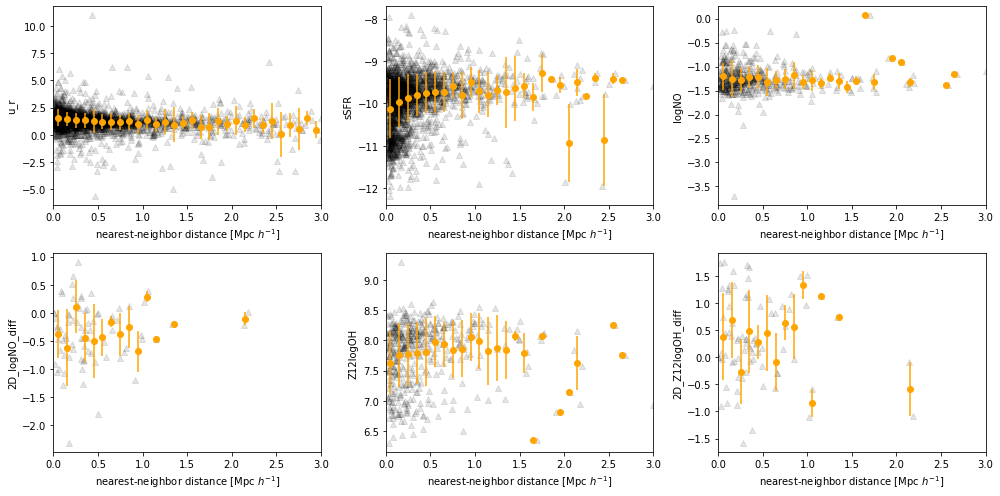

In [33]:
fig, axes = plt.subplots(2,3, figsize=(14,7), tight_layout=True)
axes = axes.flatten()

d = dwarf_table['2D_neighbor_dist'][dwarf_wall]
for _name, ax in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes):
    vals = dwarf_table[_name][dwarf_wall]
    select = ~np.isnan(vals)
    
    xc, yavg, yerr = profilehist(d[select], vals[select], bins=np.linspace(0,3,31), uncertainty='sample')
    ax.scatter(d[select], vals[select], alpha=0.1, color='k', marker='^')
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color='orange')
    ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,3));
    
    #fig.savefig('2D_wall_profile_hist.png')

### Scatterplots and Profile Histograms for Void Dwarf Galaxies

C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in tr

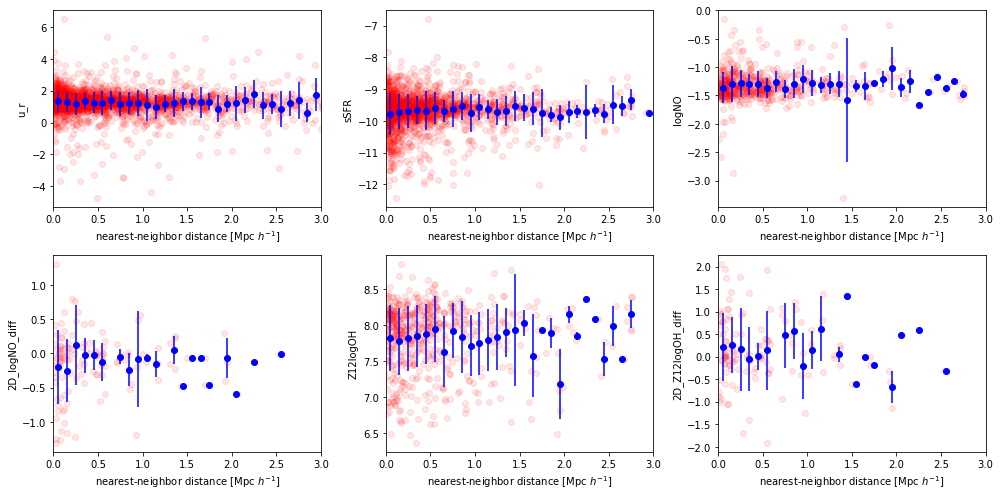

In [32]:
fig, axes = plt.subplots(2,3, figsize=(14,7), tight_layout=True)
axes = axes.flatten()

d = dwarf_table['2D_neighbor_dist'][dwarf_void]
for _name, ax in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes):
    vals = dwarf_table[_name][dwarf_void]
    select = ~np.isnan(vals)
    #print(_name, np.sum(select))
    
    xc, yavg, yerr = profilehist(d[select], vals[select], bins=np.linspace(0,3,31), uncertainty='sample')
    ax.scatter(d[select], vals[select], alpha=0.1, color='r', marker='o')
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color='blue')
    ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,3));
    
    #fig.savefig('2D_void_profile_hist.png')


### Profile Histograms for Wall and Void Dwarf Galaxies

C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in true_divide
  yavg = Y/W
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:33: RuntimeWarning: invalid value encountered in true_divide
  ystd = np.sqrt(E/W - yavg**2)
C:\Users\caeho\AppData\Local\Temp\ipykernel_17684\2670135367.py:32: RuntimeWarning: invalid value encountered in tr

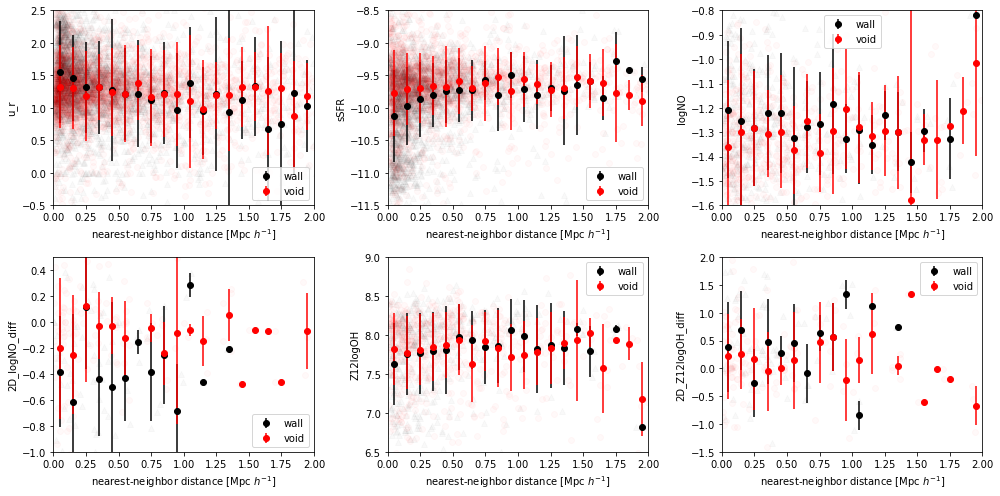

In [58]:
fig, axes = plt.subplots(2,3, figsize=(14,7), tight_layout=True)
axes = axes.flatten()

#d = dwarf_table['2D_neighbor_dist'][dwarf_void]
#for select, mc, label in zip([dwarf_wall, dwarf_void], ['orange', 'blue'], ['wall', 'void']):
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    #for _name, ax in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes):
    for _name, ax, yl in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes,
                               [(-0.5,2.5), (-11.5,-8.5), (-1.6,-0.8),(-1,0.5),(6.5,9),(-1.5,2)]):
        d = dwarf_table['2D_neighbor_dist'][select]
        vals = dwarf_table[_name][select]
        nonan = ~np.isnan(vals)
        #print(_name, np.sum(nonan))

        xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.linspace(0,3,31), uncertainty='sample')
        ax.scatter(d[nonan], vals[nonan], alpha=0.025, color=c, marker=m)
        ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)
        #ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,3));
        ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,2), ylim=yl);
        ax.legend()
        
        fig.savefig('2D_wall_void_profile_hists.png')

# Linear Regressions

Seaborn: https://seaborn.pydata.org/generated/seaborn.regplot.html

### Wall Dwarf Galaxies


In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

import seaborn as sns

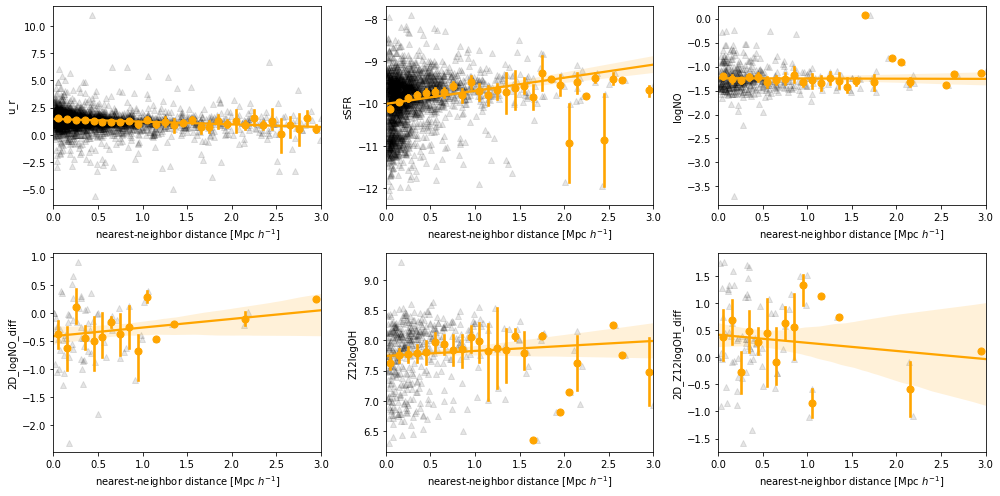

In [35]:
fig, axes = plt.subplots(2,3, figsize=(14,7), tight_layout=True)
axes = axes.flatten()

d = dwarf_table['2D_neighbor_dist'][dwarf_wall]
for _name, ax, in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes):
    vals = dwarf_table[_name][dwarf_wall]
    nonan = ~np.isnan(vals)
    
    xedges = np.linspace(0,3,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color='k', marker='^')
    
    
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color='orange', ax=ax)
    
    ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,3));
    
    #fig.savefig('2D_wall_linear_reg.png')
    

### Void Dwarf Galaxies Linear Regression Plots

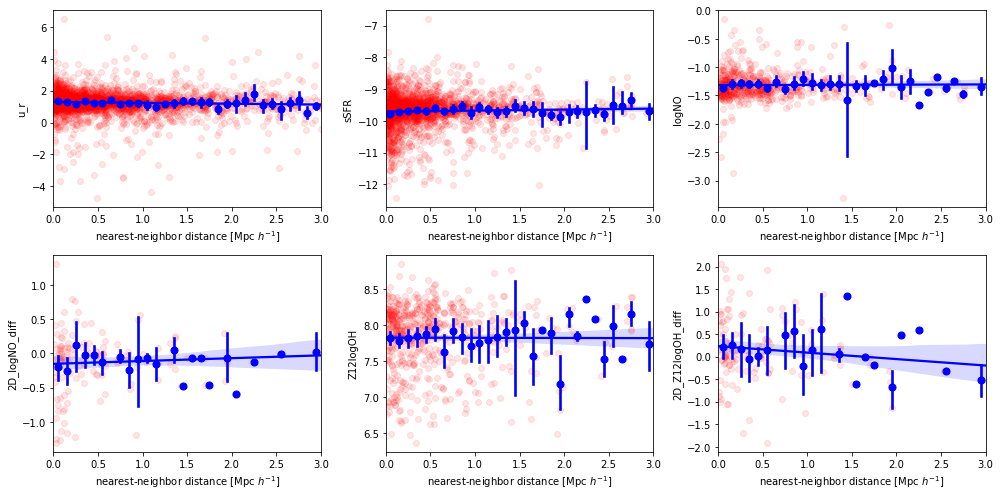

In [36]:
fig, axes = plt.subplots(2,3, figsize=(14,7), tight_layout=True)
axes = axes.flatten()

d = dwarf_table['2D_neighbor_dist'][dwarf_void]
for _name, ax, in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes):
    vals = dwarf_table[_name][dwarf_void]
    nonan = ~np.isnan(vals)
    
    xedges = np.linspace(0,3,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
    
    ax.scatter(d[nonan], vals[nonan], alpha=0.1, color='r', marker='o')
   
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color='blue', ax=ax)
    
    ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,3));
    
    #fig.savefig('2D_void_linear_reg.png')

### Linear Regressions for Wall and Void Dwarf Galaxies

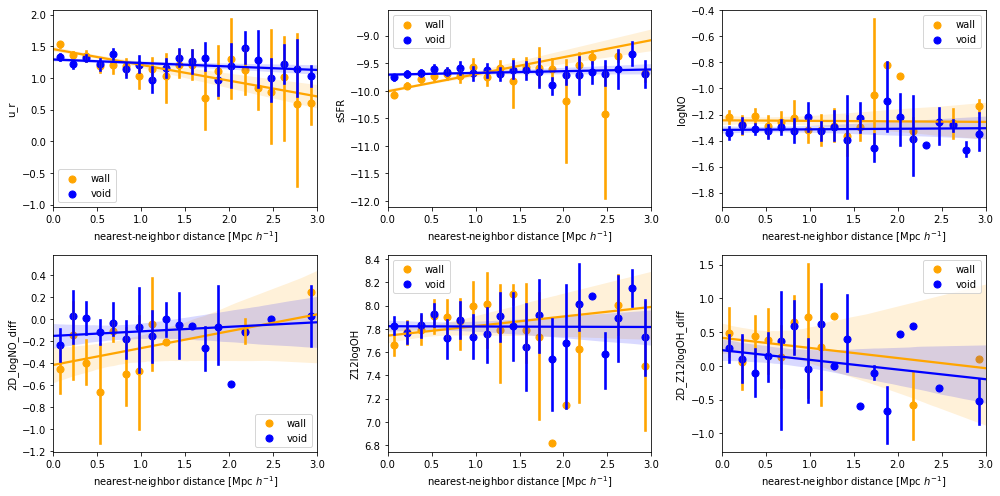

In [41]:
fig, axes = plt.subplots(2,3, figsize=(14,7), tight_layout=True)
axes = axes.flatten()

#d = dwarf_table['2D_neighbor_dist'][dwarf_void]
for select, mc, label in zip([dwarf_wall, dwarf_void], ['orange', 'blue'], ['wall', 'void']):
    for _name, ax in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes):
        d = dwarf_table['2D_neighbor_dist'][select]
        vals = dwarf_table[_name][select]
        nonan = ~np.isnan(vals)
       
        xedges = np.linspace(0,3,21)
        xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
        sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,3));
        ax.legend()
        
        #fig.savefig('2D_wall_void_linear_reg.png')

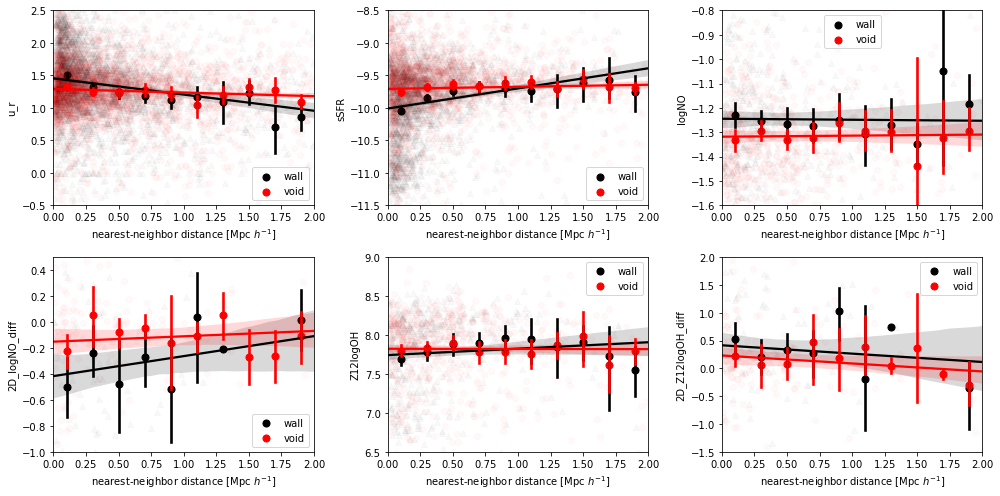

In [56]:
fig, axes = plt.subplots(2,3, figsize=(14,7), tight_layout=True)
axes = axes.flatten()

#d = dwarf_table['2D_neighbor_dist'][dwarf_void]
for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    #for _name, ax in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes):
    
    for _name, ax, yl in zip(['u_r', 'sSFR', 'logNO', '2D_logNO_diff', 'Z12logOH', '2D_Z12logOH_diff'], axes,
                               [(-0.5,2.5), (-11.5,-8.5), (-1.6,-0.8),(-1,0.5),(6.5,9),(-1.5,2)]):
        d = dwarf_table['2D_neighbor_dist'][select]
        vals = dwarf_table[_name][select]
        nonan = ~np.isnan(vals)
       
        ax.scatter(d[nonan], vals[nonan], alpha=0.025, color=c, marker=m)
        
        xedges = np.linspace(0,2,11)
        xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
        sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        #ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,2));
        
        ax.set(xlabel='nearest-neighbor distance [Mpc $h^{-1}$]', ylabel=_name, xlim=(0,2), ylim=yl);
        
        ax.legend()
        
        fig.savefig('2D_wall_void_linear_reg_edit.png')

## Stuff that will be removed soon

In [29]:
xc, yavg, yerr = profilehist(d, u_r, bins=np.linspace(0,2,21), uncertainty='sample')

NameError: name 'u_r' is not defined

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4), tight_layout=True)

xc, yavg, yerr = profilehist(d, u_r, bins=np.linspace(0,3,31), uncertainty='sample')

ax.scatter(x, y, alpha=0.1, color='k', marker='^')

ax.errorbar(xc, yavg, yerr=yerr, fmt='o')
ax.set(xlabel='$x$', ylabel='$y$', title=f'Profile plot, unc.=sample err, $N={N}$', xlim=(0,5), ylim=(-5,10));

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4), tight_layout=True)

xc, yavg, yerr = profilehist(x, y, bins=np.linspace(0,10,11))

ax.scatter(x, y, alpha=0.1, color='k', marker='^')
ax.errorbar(xc, yavg, yerr=yerr, fmt='o')
ax.set(xlabel='$x$', ylabel='$y$', title=f'Profile plot, unc.=err on mean, $N={N}$');

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

import seaborn as sns

In [ ]:
N = len(dwarf_table['u_r'][dwarf_wall])
n = len(dwarf_table['2D_neighbor_dist'][dwarf_wall])
x = dwarf_table['2D_neighbor_dist'][dwarf_wall]
y = dwarf_table['u_r'][dwarf_wall]
z = dwarf_table['u_r'][dwarf_void]
p = dwarf_table['2D_neighbor_dist'][dwarf_void]

plt.scatter(x, y, alpha=0.2)
plt.scatter(p, z, alpha=0.2)


In [ ]:
# Specify the edges of the bins and compute the bin centers.
# For some reason seaborn really wants the centers. See the documentation?
xedges = np.linspace(0,1,20)
xcenters = 0.5*(xedges[1:] + xedges[:-1])

#wall galaxies
ax = sns.regplot(x=x, y=y, x_bins=xcenters, color='orange')
ax.scatter(x, y, alpha=0.1, zorder=0, color='k', marker='^')

#void galaxies
ax = sns.regplot(x=p, y=z, x_bins=xcenters, fit_reg=None, color='c') 
ax.scatter(p, z, alpha=0.1, zorder=0, color = 'r', marker='o')

ax.set(xlabel='2D Distance',
       xlim=(0,1),
       ylabel='u-r',
       ylim=(-2,4));